In [1]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans , AgglomerativeClustering
from matplotlib import pyplot as plt 

# Agglomerative Clsutering 

Initially each point is cluster , then we start merging two closet points(or cluster) \
closest distance is calculated by 4 methods .
1. Single Link method --> (Minumum distance between two cluster , calculate all possible distance between two cluster and select minimum distance , repeat this for all cluster and select minumum of all calculated min distance and then merge  corresponding these two clsuter ).
2. Complete Link Method --> , Calculate the distance for Farthest point in two cluster , do this for each cluster then select the minimum of these farthest distances for clsuteres and then merge the corresponding clsuter .
3. Average Link Method --> , calculate the all possible distances between 2 cluster and take the average of these distances , repeat this for all clsuters and then select the minimum of these average distances , and merge the corresponding clusters 
4. Ward Method --> it calculate the centroid of 2 cluster then calculate and sum the all distances for all points from centroid to points in 2 cluster and substract the inter clsuter distance , repeat this for each cluster , and then select the minimum of these distances for all clusters , then merge the cluster corresponding to minimum distance . 

By default in SkLearn , the method is ward , all the method is computationally expensive , beacuse initially we are making n*n matrix , where n is number of points , and each entry is distance , in each iteration two points\clusters will be merged .\
This is not suitable for very large datasets 



In [3]:
customer_data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')

In [5]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
X = customer_data.iloc[:,3:5]
X.shape

(200, 2)

In [8]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
# First we need to deside the no of cluster , that we can decide by making dendogram 
# The largest vertical line which is not being cut by any horizontal line , select that vertical line 
# and then draw a horizontal line passing through this largest vertical line , count the no of cut 
# made by this horizontal line for each vertical line , the count is the no of clsuter 

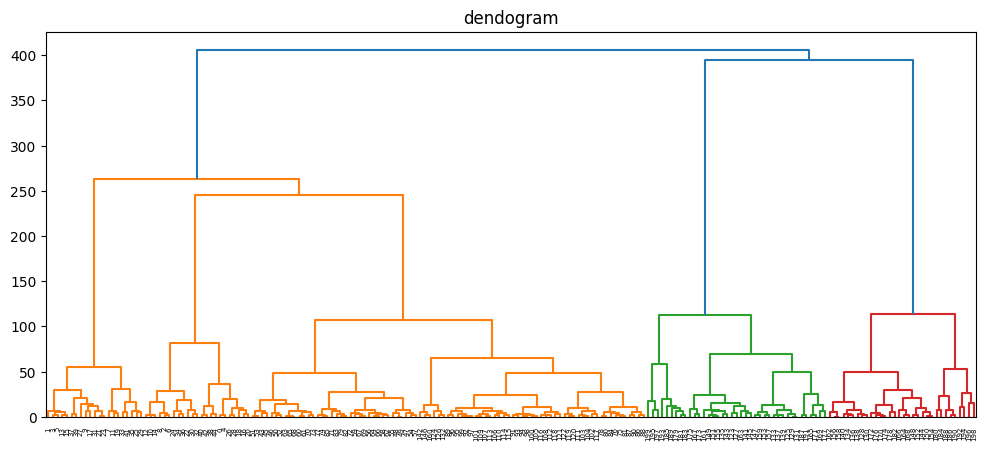

In [ ]:
from scipy.cluster import hierarchy   # hierarchy is module , not class like Kmeans , or LinearRegression
plt.figure(figsize=(12,5))            # Modlue means a python file , which contains functions
plt.title("dendogram")                # hierarchy.linakge , will call linkage( ) function from hierarchy.py file
Z = hierarchy.linkage(X , method='ward')  # compute linkage 
dend = hierarchy.dendrogram(Z)     # make dendogram and plot   , this is aonother function in hierarch.py file which takes linakge and return denogram graph
plt.show()

In [ ]:
# from above figure , no of optimum cluster = 5 

# In Kmeans or anyother class imported from sklearn , first we made object of that class , then call 
# the method inside that class , here we do not import entire module(like hierarchy.py file is a modlue)
# here from import a class from a module( i.e. from a .py file)

# if we are importing class then each method ineteract with each other methods , by self. 
# but in module each function is being called independtaly , each function need the correct value to be passed



In [ ]:
# For scipy.cluster

# scipy/                       ← main package (a folder)
# │   __init__.py
# │   ...
# └─── cluster/                ← subpackage (a folder)
#      │   __init__.py
#      │   hierarchy.py        ← module (Python file)
#      │   vq.py
#      │   ...


# Now lets see for SkLearn

# sklearn/                         ← main package (a folder)
# │   __init__.py
# │   ...
# └─── cluster/                    ← subpackage (a folder)
#      │   __init__.py
#      │   _kmeans.py              ← module (Python file, contains class KMeans)
#      │   _dbscan.py
#      │   _hierarchical.py
#      │   ...


In [17]:
from sklearn.cluster import AgglomerativeClustering , KMeans
hc = AgglomerativeClustering(n_clusters=5 ,linkage='ward') # By default it is ward
labels = hc.fit_predict(X)    # it cant predict labels for new data , kmeans can predict for the new data

In [18]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [19]:
X = X.values

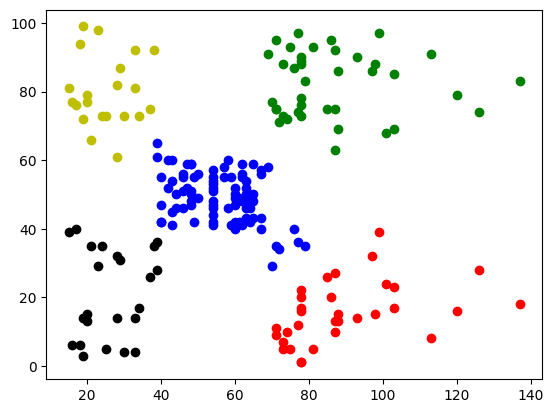

In [20]:
plt.scatter(X[labels==0 ,0] , X[labels==0 ,1] , c='r')
plt.scatter(X[labels==1 ,0] , X[labels==1 ,1] , c='b')
plt.scatter(X[labels==2 ,0] , X[labels==2 ,1] , c='g')
plt.scatter(X[labels==3 ,0] , X[labels==3 ,1] , c='y')
plt.scatter(X[labels==4 ,0] , X[labels==4 ,1] , c='black')
plt.show()